## 1. Import required Libraries

### 1.1 Basic Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt


%matplotlib inline

### 1.2 Handle Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.3 Import Scikit Learn Library 

In [3]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 1.4 Import StatsModel Library

In [4]:
import statsmodels.api as sm
from scipy import stats
#to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Data Sourcing

### 2.1 Import Dataset

In [5]:
bike_df = pd.read_csv("day.csv")

### 2.2 Data Inspection

In [6]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike_df.shape

(730, 16)

**Observations :**
    
    1. Total number of rows : 730
    2. Total number of columns : 16

In [8]:
# check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observations :**
    
    1. We have just one column with Object data type, however it contains Dates.
    2. Majority of the columns have int data type, while a few are float
    3. Some categorical fields have numerical data types (will analyse & convert them to categorical if needed)






In [9]:
#check for numerical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#check for columns present in dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 2.3 Check for Nulls

In [11]:
null_count = bike_df.isnull().sum()
print(null_count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### We have no null values present in any column of the dataset

### 2.4 Check for Duplicates

In [12]:
dup_df = bike_df.copy()

In [13]:
dup_df.drop_duplicates(inplace= True)

In [14]:
dup_df.shape

(730, 16)

In [15]:
bike_df.shape

(730, 16)

**No change in shape signifies we don't have any duplicate value present in our dataset**

### 2.5 Data Cleaning

In [16]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**As observed** :
    
    Columns : season, yr, month, holiday, weekday and weathersit despite being categorical in nature have int64 as datatype. 
        
**We can instead map some of these columns with the given details from data dictionary (Dataset Characteristics)**

#### 2.5.1 season

In [17]:
bike_df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

**It is clearly a categorical nominal data. We can map it to the respective seasons in order to draw better inference :**
    
        1: spring
        2: summer
        3: fall
        4: winter

In [18]:
bike_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)


#### 2.5.2 weekday

**Similarly mapping weekdays to the respective values**

- 0: Sunday   
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thursday
- 5: Friday
- 6: Saturday

In [19]:
bike_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)


#### 2.5.3 weathersit

**Mapping weathersit with the respective values (from data dictionary)**

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    

In [20]:
 bike_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
bike_df['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)

#since fourth category isn't present in our dataset, we don't need to map it

In [22]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,Clear/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Clear/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Clear/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 2.5.5  Remove unwanted columns

Some of the columns are redundant and an be remove without impacting our analysis :
    
1. **instant** : Just shows up the index value for each record 
2. **casual & registered** : Our target variamble cnt already shows up the sum of casual and registered and hence we can drop these two
3. **date** :  Clearly, month and year are separately displayed in other columns (month and yr) We can hence manage without this column

**Adding these changes to a new dataframe in order to preserve the original one for later reference.**

In [23]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [24]:
# creating a new data set without columns : instant, dteday casual and registered

new_bike = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [25]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


#### 2.5.6 Fix datatype

Setting up the right datatype for all numerical columns using pd.to_numeric()

In [26]:
new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']] = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']].apply(pd.to_numeric)

In [27]:
new_bike.info()

#already correct - verified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [28]:
# It's visible that even some of the categorical variables have float64/int64 datatype.
## We can convert these to object type

new_bike['mnth'] = new_bike['mnth'].astype('object')
new_bike['weekday'] = new_bike['weekday'].astype('object')
new_bike['season'] = new_bike['season'].astype('object')
new_bike['weathersit'] = new_bike['weathersit'].astype('object')


### 2.6 EDA 

#### 2.6.1 Numerical variables analysis

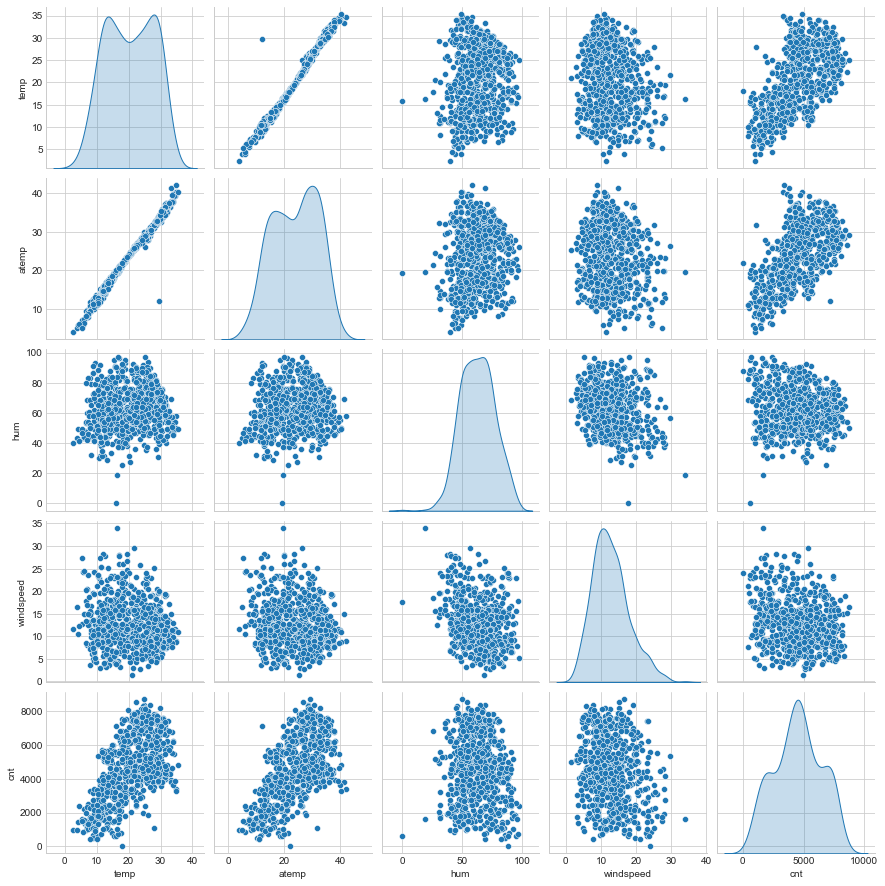

In [29]:
num_vars = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

**Inference :** From the above pair plot it can be clearly observed that there exists a linear relationship between :
        
        temp
        
        atemp
        
        cnt

**It is evident that we have two similar fields :**
    
    - temp : temperature in Celsius
    - atemp: feeling temperature in Celsius
        
We can check if there exists a positive correlation between them

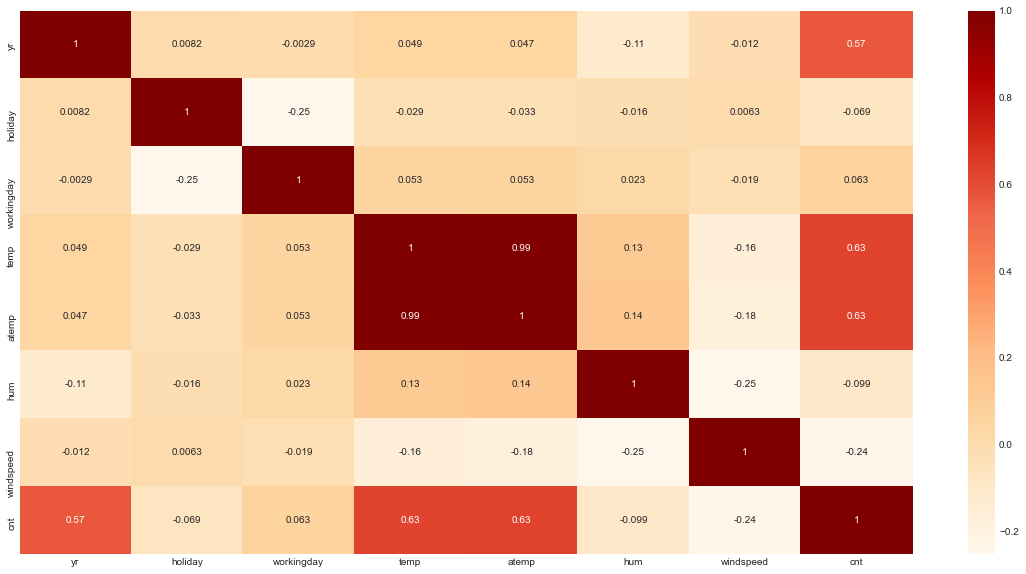

In [30]:
# using heatmap to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(new_bike.corr(), annot = True, cmap="OrRd")
plt.show()

**Inference** : As suspected, there is 99% correlation between temp and atemp. 
    
    We can hence drop one of these later while building our model.

#### 2.6.2 Categorical variables analysis

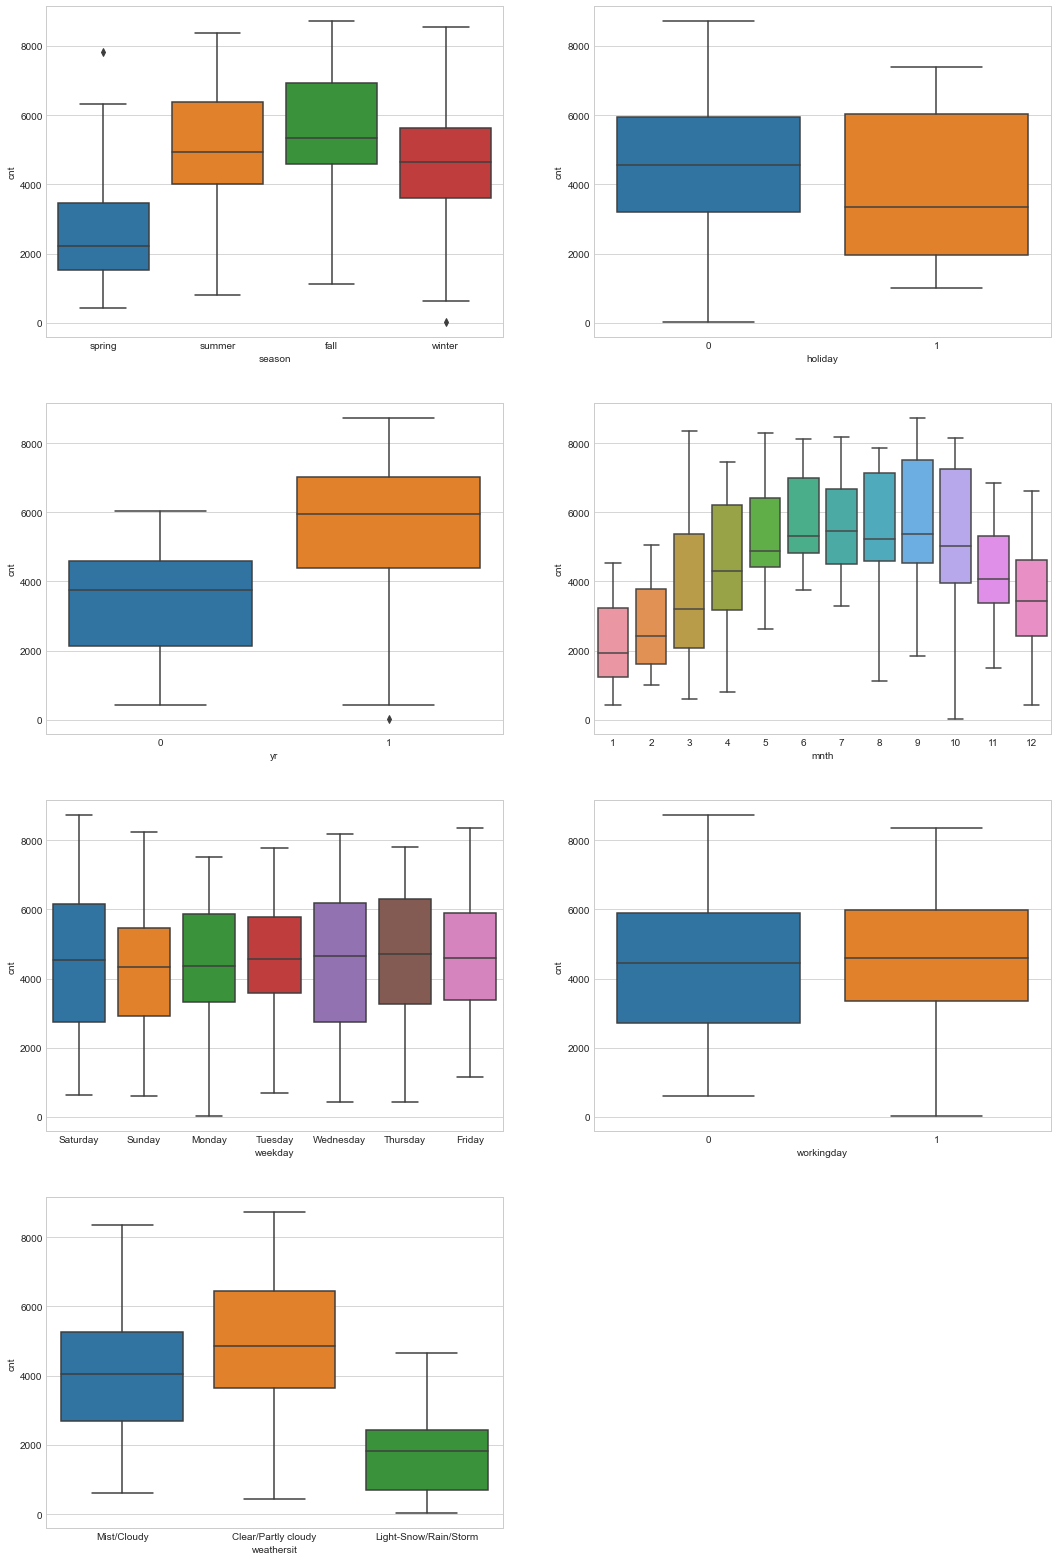

In [31]:
## Use subplots to analyse predictors (categorical variables) against target variable 'cnt' and outliers (if any)

plt.figure(figsize=(18, 28))
plt.style.use('seaborn-whitegrid')

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data= new_bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data= new_bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= new_bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data= new_bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data= new_bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= new_bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data= new_bike)

plt.show()

### Inferences :

    
   **1. season :** One-third (more than 30%) of the bookings were done in fall season and the median lies around 5000, followed by Summer and Winter. Clealry this can serve as a **good predictor** for our analysis.
    
    
   **2. holiday :** Majority(~ 97%) of the booking took place whne it wasn't a holiday. We have a very high bias here and thus it **maynot be a good predctor** variable.
     
        
   **3. yr :** During yr 1 , we have more number of bookings (almost twice) than yr 0. Since our analysis will be based only on two years (2018 and 2019), they are **important predictors**.
        
        
   **4. mnth :** Distribution of months looks like a normally distributed, with months : 5-9 leading in number of bbokings and crossing the median over around 4500-5000. This indeed can serve as a **good predictor**.
        
        
   **5. weekday :** No clear pattern observed here as all the days show a similar spread This maynot be able to serve as a **good predictor**
        
        
   **6. workingday :** We have a high booking count on working day (i.e 1)and a median value close to 5000. It may serve as a **good predictor**
       
        
   **7. weathersit :** Majority of the bookings took place during a clear/partly cloudy weather with a median at around 5000 followed by misty/cloudy weather, with median 4000. This can also serve as a **good predictor**.

#### 2.6.3 Distribution of variables across rental cnt


In [32]:
# Generic function to plot graphs

def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

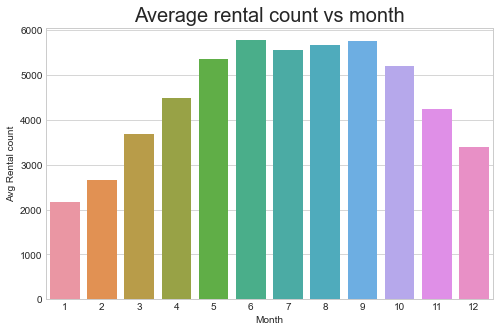

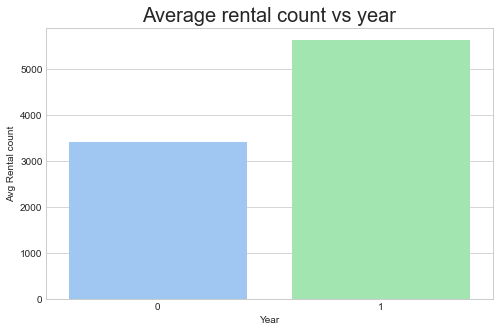

In [33]:
#month vs rental count
dist1 = bike_df.groupby(by= 'mnth').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs month', x_label = 'Month', y_label='Avg Rental count')

#yr vs rental count
dist2 = bike_df.groupby(by='yr').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs year', x_label = 'Year', y_label='Avg Rental count')

#### Inference :

**Plot 1 :** Highest rental counts during July-Sept (fall season) and lowest during Dec-Feb (extreme weather)
    
**Plot 2 :** Rental counts are almost twice for year 1 as compared to year 0

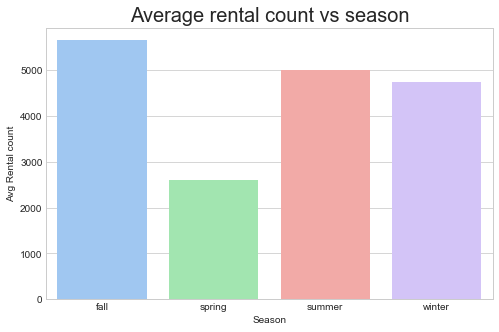

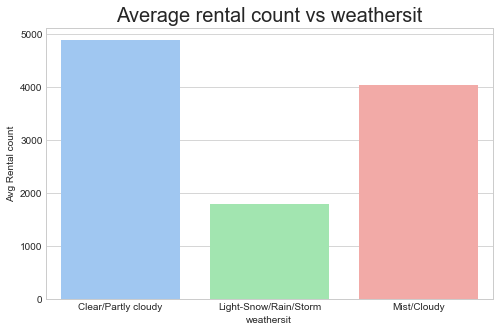

In [34]:
# season vs rental count
dist1 = bike_df.groupby(by='season').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs season', x_label = 'Season', y_label='Avg Rental count')

# weathersit vs rental count
dist2 = bike_df.groupby(by='weathersit').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs weathersit', x_label = 'weathersit', y_label='Avg Rental count')

#### Inference :

**Plot 1 :** Highest rental counts during fall season and lowest during sprimg season
    
**Plot 2 :** Highest rental counts during weather pattern clear/partly cloudy and lowest during light snow/rain/storm

## 3. Create Dummy Variables

**Steps :**

1. **Creating dummy variables** for four major categorical variables :
    
    > mnth
    
    > weathersit
    
    > season
    
    > weekday
    
    
    
2. **Drop original categorical variables** once dummies have been created


3. **Drop the first value** for each of the dummy variables

In [35]:
new_bike = pd.get_dummies(new_bike, drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   atemp                             730 non-null    float64
 5   hum                               730 non-null    float64
 6   windspeed                         730 non-null    float64
 7   cnt                               730 non-null    int64  
 8   season_spring                     730 non-null    uint8  
 9   season_summer                     730 non-null    uint8  
 10  season_winter                     730 non-null    uint8  
 11  mnth_2                            730 non-null    uint8  
 12  mnth_3  

In [36]:
new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
new_bike.shape

(730, 30)

Row count pre split : 730
    
Column vount pre split : 30

## 4. Split Data : Train and Test

Splitting the entire data set in the two parts using train_test_split method from SKLEARN library in the ratio of 80:20 :
    
   **TRAIN : 80%**
    
   **TEST : 20%**

In [38]:
## In order to ensure both train and test parts have the same number of rows, we need to specify random_state
## using random.seed() from numpy to implement this.

np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.8, test_size = 0.2, random_state = 111)

In [39]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 520 to 724
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                584 non-null    int64  
 1   holiday                           584 non-null    int64  
 2   workingday                        584 non-null    int64  
 3   temp                              584 non-null    float64
 4   atemp                             584 non-null    float64
 5   hum                               584 non-null    float64
 6   windspeed                         584 non-null    float64
 7   cnt                               584 non-null    int64  
 8   season_spring                     584 non-null    uint8  
 9   season_summer                     584 non-null    uint8  
 10  season_winter                     584 non-null    uint8  
 11  mnth_2                            584 non-null    uint8  
 12  mnth_3

#### 4.1 Inspect dataset post split

In [40]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 358 to 472
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                146 non-null    int64  
 1   holiday                           146 non-null    int64  
 2   workingday                        146 non-null    int64  
 3   temp                              146 non-null    float64
 4   atemp                             146 non-null    float64
 5   hum                               146 non-null    float64
 6   windspeed                         146 non-null    float64
 7   cnt                               146 non-null    int64  
 8   season_spring                     146 non-null    uint8  
 9   season_summer                     146 non-null    uint8  
 10  season_winter                     146 non-null    uint8  
 11  mnth_2                            146 non-null    uint8  
 12  mnth_3

In [41]:
bike_train.shape

(584, 30)

As 80% of 730 = 584

In [42]:
bike_test.shape

(146, 30)

As 20 % of 730 = 146

#### 4.2 Check the correlation among all variables (after adding dummies)



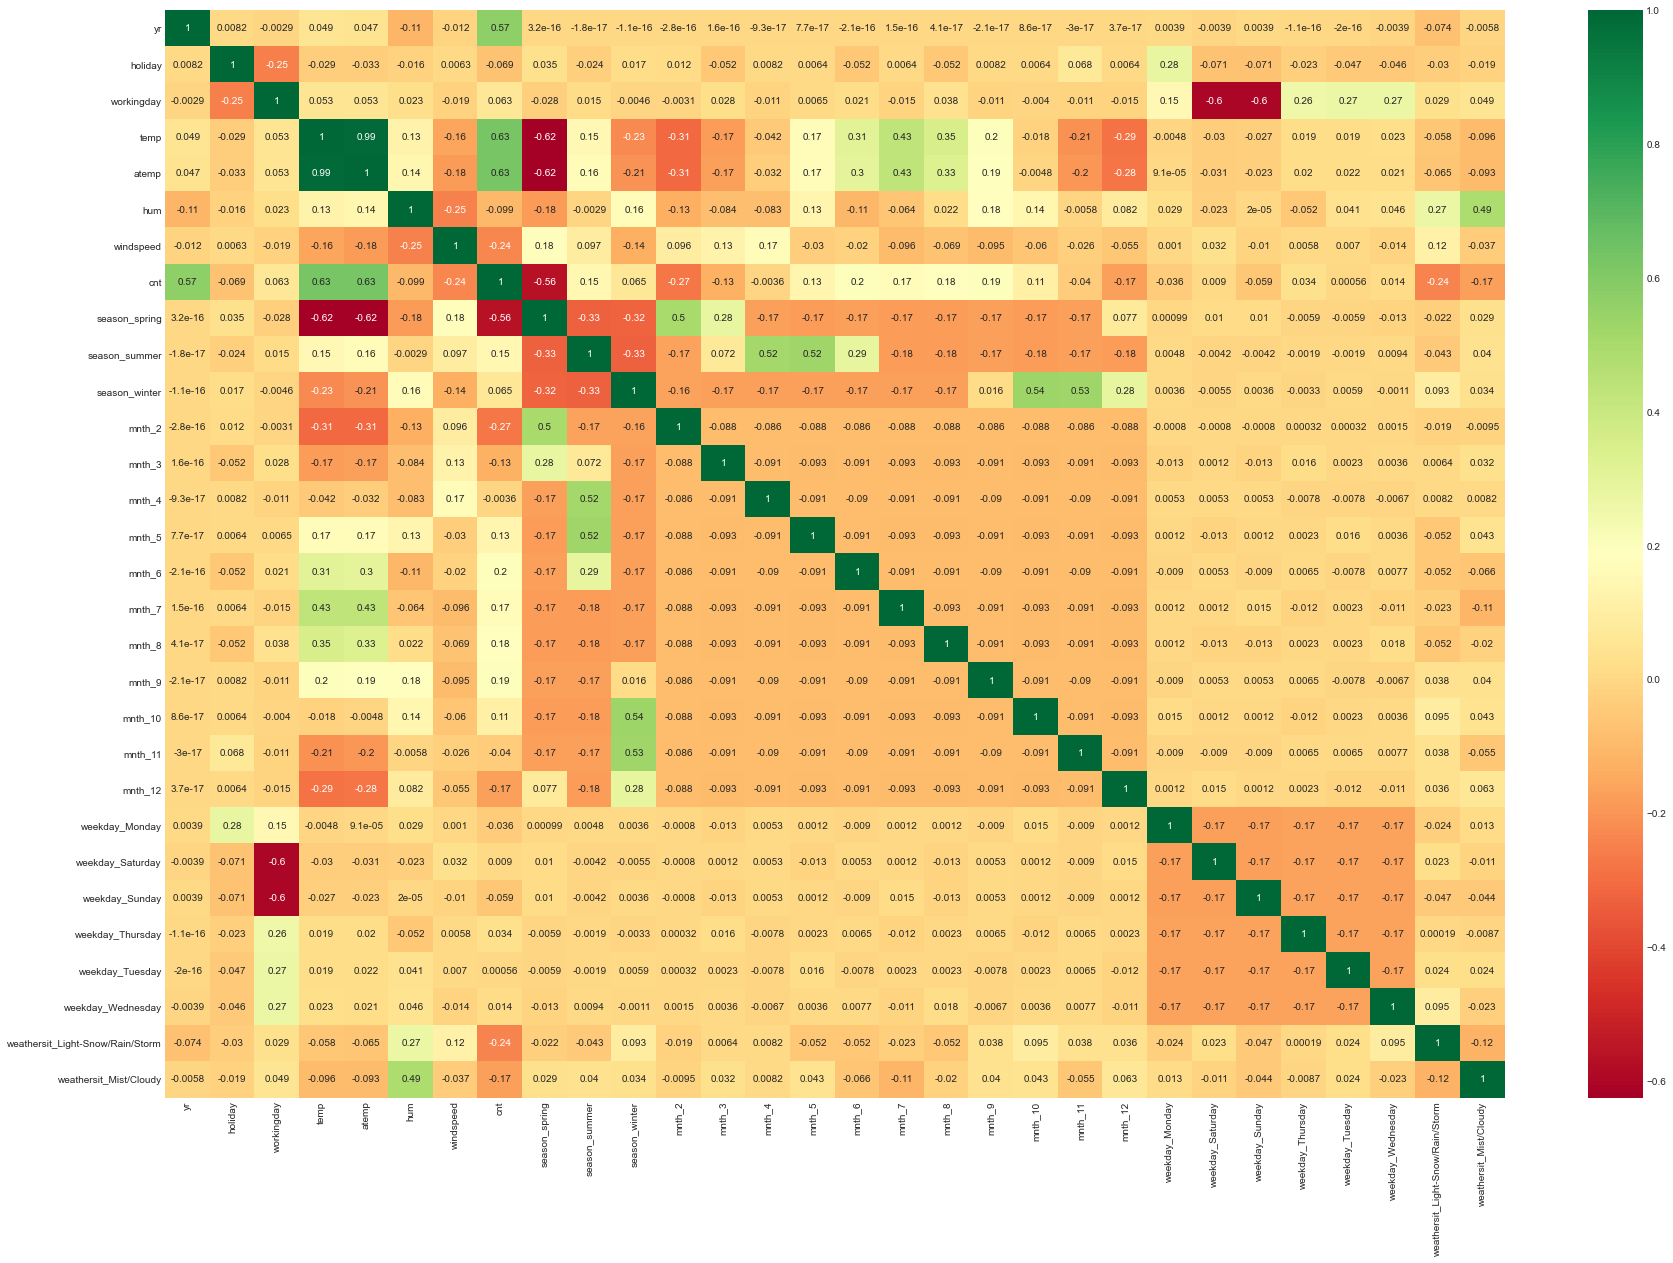

In [43]:
plt.figure(figsize = (30,20))
sns.heatmap(new_bike.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#### Inferences :

   - Variables having a **high collinearity with target variable 'cnt'** :
        
        atemp (0.63)
        
        yr  (0.57)
        
        season spring (-0.56)
        
        
        
        
        
   - Variables having a **high to moderate collinearity with each other** :
        
        temp and atemp (0.99)
        
        hum and weathersit_Mist/Cloudy  (0.49)
        
        season_winter and mnth_10 (0.54), mnth_11  (0.53)
        
        season_summer and mnth_4 (0.54), mnth_5  (0.54)
        
        atemp and mnth_7  (0.43)
        
        mnth_2 and season_spring (0.5)
    
        

## 5. Rescale Features

In [44]:
scale =  MinMaxScaler()

In [45]:
# before rescaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
520,1,0,1,22.174153,26.29460,61.3333,14.041525,7001,0,1,...,0,0,0,0,0,0,1,0,0,1
89,0,0,1,11.001653,12.87875,91.8333,14.582282,1685,0,1,...,0,0,0,0,0,1,0,0,1,0
354,0,0,1,17.561653,21.40085,85.8333,14.833800,2660,1,0,...,0,1,0,0,0,0,0,1,0,1
121,0,0,1,22.515847,26.64165,73.0000,12.291418,4401,0,1,...,0,0,1,0,0,0,0,0,0,1
687,1,0,1,15.614153,18.78105,62.3333,15.749489,5499,0,0,...,1,0,1,0,0,0,0,0,0,1


In [46]:
# Apply scaler on the numerical variables of train dataset

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[bike_num] = scale.fit_transform(bike_train[bike_num])

In [47]:
#post rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.486301,0.027397,0.691781,0.546698,0.522772,0.523951,0.418017,0.502523,0.243151,0.251712,...,0.085616,0.077055,0.148973,0.150685,0.130137,0.150685,0.145548,0.133562,0.023973,0.332192
std,0.500241,0.163378,0.462153,0.227567,0.213071,0.192856,0.190444,0.232892,0.429353,0.434369,...,0.280037,0.266907,0.356367,0.358048,0.336743,0.358048,0.352955,0.340472,0.153095,0.471403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346603,0.338253,0.372244,0.278404,0.342565,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.556613,0.540924,0.525522,0.393453,0.506832,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746117,0.700253,0.663718,0.527203,0.673283,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
520,1,0,1,0.600225,0.586515,0.499999,0.468095,0.808715,0,1,...,0,0,0,0,0,0,1,0,0,1
89,0,0,1,0.260677,0.234312,0.924593,0.488278,0.154357,0,1,...,0,0,0,0,0,1,0,0,1,0
354,0,0,1,0.460045,0.458041,0.841067,0.497666,0.274372,1,0,...,0,1,0,0,0,0,0,1,0,1
121,0,0,1,0.610610,0.595626,0.662413,0.402773,0.488676,0,1,...,0,0,1,0,0,0,0,0,0,1
687,1,0,1,0.400857,0.389264,0.513920,0.531843,0.623831,0,0,...,1,0,1,0,0,0,0,0,0,1


# 6. Build Linear Model

We will make use of **RFE and LinearRegression libraries** from sklearn for implementing Linear Regression using Recurssive feature elimination

We need 2 variables in order to build a model : X and Y
    
    Y : Target variable (dependent)
    X : Predictor variables (independent)
        
We have around 28 columns (variables), excluding the target variable. Since it isn't easy to analyse all these predictors, will consider **15 variables** to start with.

**RFE** method shall be used here to which we will provide the arbitrarily chosen 15 predictors (as 1, and others as 0).

### 6.1 Feature scaling using RFE

In [49]:
# creating y variable to hold our taget variable : cnt
y = bike_train.pop('cnt')

In [50]:
x = bike_train

In [51]:
lr = LinearRegression()

In [52]:
# using Linearregression().fit() in order to get the right fitting model

lr.fit(x, y)

LinearRegression()

In [53]:
#Apply RFE with 15 output variables

r = RFE(lr, 15)

In [54]:
r = r.fit(x, y)

In [55]:
#creating a new dataframe to store columns along with their respective ranks and support values (status) 

r_bike = pd.DataFrame ({'Predictors' : x.columns, 'Status' : r.support_, 'Rank' : r.ranking_})

In [56]:
r_bike.sort_values(by = 'Rank')

,Predictors,Status,Rank
0,yr,True,1
23,weekday_Sunday,True,1
22,weekday_Saturday,True,1
18,mnth_10,True,1
17,mnth_9,True,1
27,weathersit_Light-Snow/Rain/Storm,True,1
13,mnth_5,True,1
28,weathersit_Mist/Cloudy,True,1
3,temp,True,1
1,holiday,True,1


#### Now we have our 15 chosen predictors evaluated by RFE.

The ones ranked as 1 are the top predictors which will have a major impact on the outcome.

**However, it is not a good practice to fully rely on this and hence we must validate this further using different models and eliminate the features that aren't required or doesn't satify a given criteria.**

In [57]:
## we now create a new general function for further calculating the VIF (variance inflation factor) for our models.

def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Predictors']  = df.columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(df.values, v) for v in range(df.shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

### 6.2 Model building using STATS MODEL

We will use StatsModel now in order to build different models

#### 6.2.1  MODEL-1

In [58]:
## VIF 

get_vif(x)

,Predictors,VIF_Value
0,temp,204.28
1,atemp,187.35
2,workingday,69.37
3,weekday_Saturday,14.93
4,weekday_Sunday,13.25
5,season_spring,10.37
6,mnth_7,10.04
7,mnth_8,9.35
8,season_winter,8.46
9,season_summer,7.82


In [59]:
#extracting all columns with "True" status, i.e RFE selected variables and storing them in new_col

new_col = x.columns[r.support_]
new_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_Saturday',
       'weekday_Sunday', 'weathersit_Light-Snow/Rain/Storm',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [60]:
#checking out variables/columns rejected by RFE
x.columns[~r.support_]


Index(['season_summer', 'season_winter', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [61]:
# creating a new dataframe x_rfe with RFE selected variables

x_rfe = x[new_col]

In [62]:
# create Model-1

#adding constant
x_lr1 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m1 = sm.OLS(y, x_lr1).fit()

In [63]:
# check the obtained parameters from first generated model

lr_m1.params

const                               0.245140
yr                                  0.249041
holiday                             0.015678
workingday                          0.089878
temp                               -0.209113
atemp                               0.626002
hum                                -0.145096
windspeed                          -0.101244
season_spring                      -0.159335
mnth_5                              0.043540
mnth_9                              0.106259
mnth_10                             0.091980
weekday_Saturday                    0.089132
weekday_Sunday                      0.050451
weathersit_Light-Snow/Rain/Storm   -0.197219
weathersit_Mist/Cloudy             -0.054313
dtype: float64

In [64]:
## Get the summary of linear regression result for model 1

print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     227.3
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.90e-222
Time:                        13:37:51   Log-Likelihood:                 573.50
No. Observations:                 584   AIC:                            -1117.
Df Residuals:                     569   BIC:                            -1051.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : atemp (p-val = 0.007) and temp (p-val = 0.331)
    
- p-val > 0.05 variables : temp(0.331) and holiday(0.417)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As "temp" variable is common for both, VIF > 5 and p-val > 0.05, it needs to be dropped**

### 6.2.2 MODEL-2

We proceed after removing **temp due to it's high VIF as well as p-val > 0.05** and redesigning the model

In [65]:
new_col = new_col.drop(['temp'])
x_rfe = x[new_col]

In [66]:
## VIF

get_vif(x_rfe)

,Predictors,VIF_Value
0,workingday,25.20
1,weekday_Saturday,6.15
2,weekday_Sunday,5.69
3,hum,2.07
4,holiday,2.02
5,atemp,1.82
6,season_spring,1.81
7,weathersit_Mist/Cloudy,1.64
8,weathersit_Light-Snow/Rain/Storm,1.38
9,windspeed,1.16


In [67]:
# create Model-2

#adding constant
x_lr2 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m2 = sm.OLS(y, x_lr2).fit()

In [68]:
# check the obtained parameters from second generated model

lr_m2.params

const                               0.247493
yr                                  0.249325
holiday                             0.015372
workingday                          0.090729
atemp                               0.401735
hum                                -0.140763
windspeed                          -0.106492
season_spring                      -0.159586
mnth_5                              0.043719
mnth_9                              0.104550
mnth_10                             0.093487
weekday_Saturday                    0.089940
weekday_Sunday                      0.051452
weathersit_Light-Snow/Rain/Storm   -0.201442
weathersit_Mist/Cloudy             -0.055324
dtype: float64

In [69]:
## Get the summary of linear regression result for model 2

print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     244.7
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.91e-223
Time:                        13:37:51   Log-Likelihood:                 573.02
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     570   BIC:                            -1057.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : workingday (25.20) and weekday_Saturday (6.15)
    
- p-val > 0.05 variables :  holiday(0.426)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As p-val <0.05 holds a priority than VIF > 5, for "holiday" it is still above the border mark of 5 and infact increased from model 1, it needs to be dropped**

### 6.2.3 MODEL-3

We now proceed after removing **holiday** due giving a priority to p-val : 0.426


In [70]:
new_col = new_col.drop(['holiday'])
x_rfe = x[new_col]

In [71]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,hum,14.13
1,workingday,13.06
2,atemp,10.76
3,windspeed,5.64
4,weekday_Saturday,3.57
5,weekday_Sunday,3.33
6,weathersit_Mist/Cloudy,2.39
7,season_spring,2.15
8,yr,1.97
9,weathersit_Light-Snow/Rain/Storm,1.37


In [72]:
# create Model-3

#adding constant
x_lr3 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m3 = sm.OLS(y, x_lr3).fit()

In [73]:
# check the obtained parameters from third generated model

lr_m3.params

const                               0.262865
yr                                  0.249325
workingday                          0.075357
atemp                               0.401735
hum                                -0.140763
windspeed                          -0.106492
season_spring                      -0.159586
mnth_5                              0.043719
mnth_9                              0.104550
mnth_10                             0.093487
weekday_Saturday                    0.074568
weekday_Sunday                      0.036080
weathersit_Light-Snow/Rain/Storm   -0.201442
weathersit_Mist/Cloudy             -0.055324
dtype: float64

In [74]:
## Get the summary of linear regression result for model 3

print(lr_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     244.7
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.91e-223
Time:                        13:37:51   Log-Likelihood:                 573.02
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     570   BIC:                            -1057.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : workingday (13.06) and hum (14.13)
    
- p-val > 0.05 variables :  weekday_Sunday(0.154)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As p-val holds a priority than VIF, for "weekday_Sunday" it is still at the border mark of 5 and infact increased, it needs to be dropped**

### 6.2.4 MODEL-4

We will now drop **weekday_Sunday, due to it's high p-val : 0.154** and redesigning the model

In [75]:
new_col = new_col.drop(['weekday_Sunday'])
x_rfe = x[new_col]

In [76]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,hum,11.86
1,atemp,9.38
2,windspeed,4.80
3,workingday,4.68
4,weathersit_Mist/Cloudy,2.34
5,season_spring,1.98
6,yr,1.94
7,weekday_Saturday,1.78
8,weathersit_Light-Snow/Rain/Storm,1.33
9,mnth_5,1.24


In [77]:
# create Model-4

#adding constant
x_lr4 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m4 = sm.OLS(y, x_lr4).fit()

In [78]:
# check the obtained parameters from fourth generated model

lr_m4.params

const                               0.293109
yr                                  0.249080
workingday                          0.045527
atemp                               0.401497
hum                                -0.140989
windspeed                          -0.106392
season_spring                      -0.159626
mnth_5                              0.043503
mnth_9                              0.104195
mnth_10                             0.093118
weekday_Saturday                    0.044726
weathersit_Light-Snow/Rain/Storm   -0.201413
weathersit_Mist/Cloudy             -0.055344
dtype: float64

In [79]:
## Get the summary of linear regression result for model 4

print(lr_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     264.4
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          4.82e-224
Time:                        13:37:52   Log-Likelihood:                 571.98
No. Observations:                 584   AIC:                            -1118.
Df Residuals:                     571   BIC:                            -1061.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : hum (11.86) and atemp (9.38)
    
- p-val > 0.05 variables :  Nome
    
- R-squared : 0.848
    
- Adj-R squared : 0.844

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered and hence "hum" needs to be dropped**

### 6.2.5 MODEL-5

We will now drop **hum**, and redesigning the model

In [80]:
new_col = new_col.drop(['hum'])
x_rfe = x[new_col]

In [81]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.79
1,windspeed,4.80
2,workingday,4.53
3,yr,1.94
4,season_spring,1.78
5,weekday_Saturday,1.75
6,weathersit_Mist/Cloudy,1.52
7,mnth_5,1.19
8,mnth_9,1.19
9,mnth_10,1.17


In [82]:
# create Model-5

#adding constant
x_lr5 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m5 = sm.OLS(y, x_lr5).fit()

In [83]:
# check the obtained parameters from fifth generated model

lr_m5.params

const                               0.223695
yr                                  0.254538
workingday                          0.049828
atemp                               0.383837
windspeed                          -0.074897
season_spring                      -0.159744
mnth_5                              0.030741
mnth_9                              0.093859
mnth_10                             0.084278
weekday_Saturday                    0.049106
weathersit_Light-Snow/Rain/Storm   -0.270955
weathersit_Mist/Cloudy             -0.086146
dtype: float64

In [84]:
## Get the summary of linear regression result for model 5

print(lr_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     274.9
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          4.76e-220
Time:                        13:37:52   Log-Likelihood:                 559.63
No. Observations:                 584   AIC:                            -1095.
Df Residuals:                     572   BIC:                            -1043.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : atemp (5.79) and windspeed (4.80)
    
- p-val > 0.05 variables :  Nome, but **mnth_5 has a comparatively higher p-val (0.31) than others**
    
- R-squared : 0.848
    
- Adj-R squared : 0.844

    
**As there isn't any variable with  p-val > 0.05, we can either drop VIF > 5 i.e atemp or mnth_5. Considering "atemp" could be an important predictor variable for our analysis, we keep it and drop mnth_5**

### 6.2.6 MODEL-6

We will now drop **mnth_5**, due to it's high VIF and redesigning the model.

**Note :** even though atemp has higher vif than 5, it could be a crucial factor, for our model


In [85]:
new_col = new_col.drop(['mnth_5'])
x_rfe = x[new_col]

In [86]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.63
1,windspeed,4.80
2,workingday,4.53
3,yr,1.94
4,season_spring,1.75
5,weekday_Saturday,1.75
6,weathersit_Mist/Cloudy,1.51
7,mnth_9,1.16
8,mnth_10,1.15
9,weathersit_Light-Snow/Rain/Storm,1.08


In [87]:
# create Model-6

#adding constant
x_lr6 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m6 = sm.OLS(y, x_lr6).fit()

In [88]:
# check the obtained parameters from sixth generated model

lr_m6.params

const                               0.226552
yr                                  0.254617
workingday                          0.049166
atemp                               0.387344
windspeed                          -0.075407
season_spring                      -0.163442
mnth_9                              0.088835
mnth_10                             0.079700
weekday_Saturday                    0.047985
weathersit_Light-Snow/Rain/Storm   -0.272086
weathersit_Mist/Cloudy             -0.084383
dtype: float64

In [89]:
## Get the summary of linear regression result for model 6

print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     300.0
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          2.72e-220
Time:                        13:37:52   Log-Likelihood:                 557.26
No. Observations:                 584   AIC:                            -1093.
Df Residuals:                     573   BIC:                            -1044.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference**

This looks a fairly nice model as our **R-squared value is 0.840 and Adjusted R squared is 0.837**. But let us try to optimise it further and see if few other less significant variables can be dropped


- Highest VIF value variables : atemp (5.63) and windspeed (4.80)
    
- p-val > 0.05 variables :  Nome
    

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered. We can't drop atemp due to it's probable high significance**, hence we will proceed with **dropping windspeed** as it is almost equals 5


### 6.2.7 MODEL-7

We will now drop **windspeed** due it's borderline VIF value with 5

In [90]:
new_col = new_col.drop(['windspeed'])
x_rfe = x[new_col]

In [91]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,4.57
1,workingday,4.26
2,yr,1.93
3,weekday_Saturday,1.66
4,season_spring,1.51
5,weathersit_Mist/Cloudy,1.50
6,mnth_9,1.15
7,mnth_10,1.14
8,weathersit_Light-Snow/Rain/Storm,1.06


In [92]:
# create Model-7

#adding constant
x_lr7 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m7 = sm.OLS(y, x_lr7).fit()

In [93]:
# check the obtained parameters from seventh generated model

lr_m7.params

const                               0.191199
yr                                  0.254415
workingday                          0.049037
atemp                               0.395268
season_spring                      -0.165375
mnth_9                              0.093711
mnth_10                             0.082149
weekday_Saturday                    0.046455
weathersit_Light-Snow/Rain/Storm   -0.281931
weathersit_Mist/Cloudy             -0.083761
dtype: float64

In [94]:
## Get the summary of linear regression result for model 7

print(lr_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     325.2
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          8.22e-219
Time:                        13:37:52   Log-Likelihood:                 550.79
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     574   BIC:                            -1038.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference**

Our **R-squared value slightly dropped to 0.836 from 0.840 and Adjusted R squared to 0.833 from 0.837**. 

- Highest VIF value variables : None
    
- p-val > 0.05 : None
    

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered. We can't drop atemp due to it's probable high significance, hence are left with 2 options :

    1. Consider this as our final model
    2. Drop "workingday" which has VIF = 4.26 i.e just slightly before VIF
    
**Let us consider option 2 and see how it affects our model**


### 6.2.8 MODEL-8

We will ow drop **workingday** due to it's borline VIF value with 5 

In [95]:
new_col = new_col.drop(['workingday'])
x_rfe = x[new_col]

In [96]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,2.29
1,yr,1.91
2,weathersit_Mist/Cloudy,1.46
3,season_spring,1.24
4,weekday_Saturday,1.16
5,mnth_9,1.15
6,mnth_10,1.14
7,weathersit_Light-Snow/Rain/Storm,1.04


In [97]:
# create Model-8

#adding constant
x_lr8 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m8 = sm.OLS(y, x_lr8).fit()

In [98]:
# check the obtained parameters from eighth generated model

lr_m8.params

const                               0.229737
yr                                  0.254331
atemp                               0.396585
season_spring                      -0.164258
mnth_9                              0.091205
mnth_10                             0.081080
weekday_Saturday                    0.006491
weathersit_Light-Snow/Rain/Storm   -0.273502
weathersit_Mist/Cloudy             -0.082013
dtype: float64

In [99]:
## Get the summary of linear regression result for model 8

print(lr_m8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     351.9
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          6.93e-216
Time:                        13:37:52   Log-Likelihood:                 540.90
No. Observations:                 584   AIC:                            -1064.
Df Residuals:                     575   BIC:                            -1024.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference**

Our **R-squared value again slightly dropped to 0.830 from 0.836 and Adjusted R squared to 0.828 from 0.833**.  However, a classic result achieved for the VIF values.

**VIF for all variables dropped below 2.5. We already know, lower the VIF, better the model.**


- VIF > 5  variables : None
    
- p-val > 0.05   : weekday_Saturday
    

**But, at the same time, p-val for weekday_Saturday jumped to 0.562. This is clearly unacceptable. Hence we must drop it.**

  


### 6.2.9 MODEL-9

We drop **weekday_Saturday** due to it's very high p-val 

In [100]:
new_col = new_col.drop(['weekday_Saturday'])
x_rfe = x[new_col]

In [101]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,2.21
1,yr,1.91
2,weathersit_Mist/Cloudy,1.46
3,season_spring,1.23
4,mnth_9,1.15
5,mnth_10,1.13
6,weathersit_Light-Snow/Rain/Storm,1.04


In [102]:
# create Model-9

#adding constant
x_lr9 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m9 = sm.OLS(y, x_lr9).fit()

In [103]:
# check the obtained parameters from ninth generated model

lr_m9.params

const                               0.231230
yr                                  0.254277
atemp                               0.395758
season_spring                      -0.164519
mnth_9                              0.091413
mnth_10                             0.081014
weathersit_Light-Snow/Rain/Storm   -0.273211
weathersit_Mist/Cloudy             -0.082043
dtype: float64

In [104]:
## Get the summary of linear regression result for model 9

print(lr_m9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     402.5
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          3.94e-217
Time:                        13:37:52   Log-Likelihood:                 540.73
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     576   BIC:                            -1030.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Inferences :

Woah! No change at all in R-squared and Adjusted R-squared

> Finally we have the **p value of all variables exactly equal to zero. Yay!**

> Also, **R-squared and adjusted R-squared values remained the same** i.e 0.830 and 0.828 respectively (difference = 0.002)
    
> So we **removed an additional variable without any compromise to R squared value.** This indeed is a rare to achieve

> **The VIF values of all variables are also below 2.5** which is an equally good indicator for a significant model**


**Will consider this as our final model unless our Test data shows metrics significantly different than above (trained model)**


## 7. Final Model Validation

**Final model has :**
    
    Number of variables : 7 
        
    R-squared : 0.830
        
    Adjusted R-squared : 0.828
        
    p-val : 0.0000 for all variables
        
    VIF : Below 2.5 for all variables

### 7.1  Coefficient Analysis

#### Coefficient values for final model variables are :


    
> **const**                                            0.2312

> **yr**                                               0.2543

> **atemp**                                            0.3958

> **season_spring**                                   -0.1645

> **mnth_9**                                           0.0914

> **mnth_10**                                          0.0810

> **weathersit_Light-Snow/Rain/Storm**                -0.2732

> **weathersit_Mist/Cloudy**                          -0.0820


### Inferences :


1. **yr :** It has coefficient value **0.2543**. Hence, a unit increase in yr will increase the number of hired bikes by 0.2543 units
    

2. **atemp :** It has coefficient value **0.3958**. Hence, a unit increase in atemp will increase the number of hired bikes by 0.3958 units


3. **season_spring :** It has coefficient value **-0.1645**. Hence, a unit increase in season_spring will decrease the number of hired bikes by 0.1645 units

    
4. **mnth_9 :** It has coefficient value **0.0914**. Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0914 units


5. **mnth_10** : It has coefficient value **0.0810**. Hence, a unit increase in mnth_10 will increase the number of hired bikes by 0.0810 units


6. **weathersit_Light-Snow/Rain/Storm** : It has coefficient value **-0.2732**. Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by 0.2732 units


7. **weathersit_Mist/Cloudy :** It has coefficient value **-0.0820**. Hence, a unit increase in weathersit_Mist/Cloudy will decrease the number of hired bikes by 0.0820 units
    


### 7.2 Hypothesis Testing

**H0 (null hypothesis) :** All coefficients = 0, i.e B0, B1, ... Bi = 0
    
**H1 (alternate hypothesis)** : At least one of the coefficient must be non-zero

#### Inference :

**None of the coefficient for our final model variables equals zero, we will reject the null hypothesis**

### Equation of best fit as per model 7

**cnt** = 0.2312 + (yr x 0.2543) + (atemp x 0.3958) - (season_spring x 0.1645) + (mnth_9 x 0.0914) + (mnth_10 x 0.0810) - (weathersit_Light-Snow/Rain/Storm x 0.2732) - (weathersit_Mist/Cloudy x 0.0820)

## 7.3 Assumptions of Linear Regression

**Five assumptions of Linear regression are :**


**1. Normality :** Error terms are normally distributed (around mean = 0) i.e, for any fixed value of X, Y is normally distributed.
    
    
**2. Linearity:** The relationship between X and the mean of Y is linear.
    
    
**3. No or little multicollinearity :** Observations are independent of each other.
      
    
**4. Homoscedasticity :** The variance of residual is the same for any value of X.
    
    
**5. No pattern or auto-correlation :** Error terms(residuals) are independent of predicted value.

### 7.3.1 Error terms are normally distributed  (around mean = 0)

In [105]:
# PERFORMING RESIDUAL ANALYSIS ON TRAINING DATA

y_pred =  lr_m9.predict(x_lr9)

<Figure size 432x288 with 0 Axes>

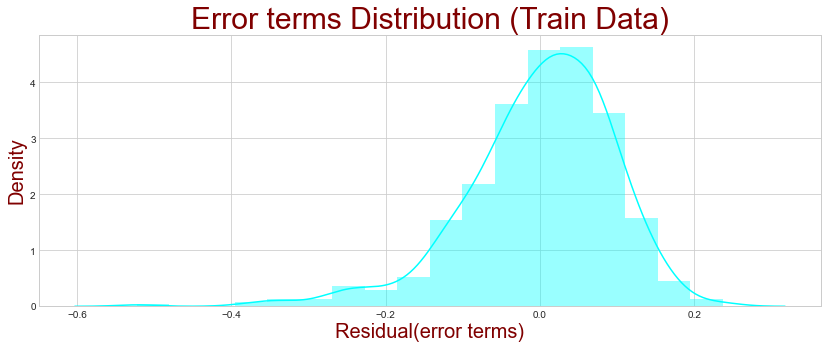

In [106]:
#plotting hist plot to analyse residuals

residual = y-y_pred

fig= plt.figure()
plt.figure(figsize = (14,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (Train Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

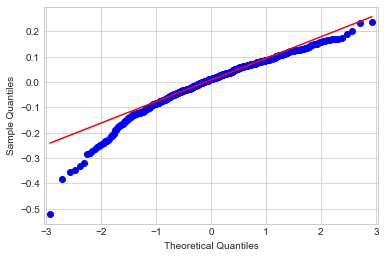

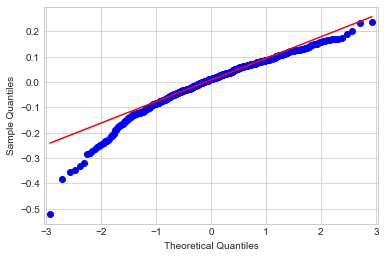

In [107]:
# Q-Q Plot : compare the residuals against normal distribution
sm.qqplot(residual, line='q')

#### Clearly the residuals are normally distributed around zero.

### 7.3.2 A linear relationship exists between X and Y
                                            

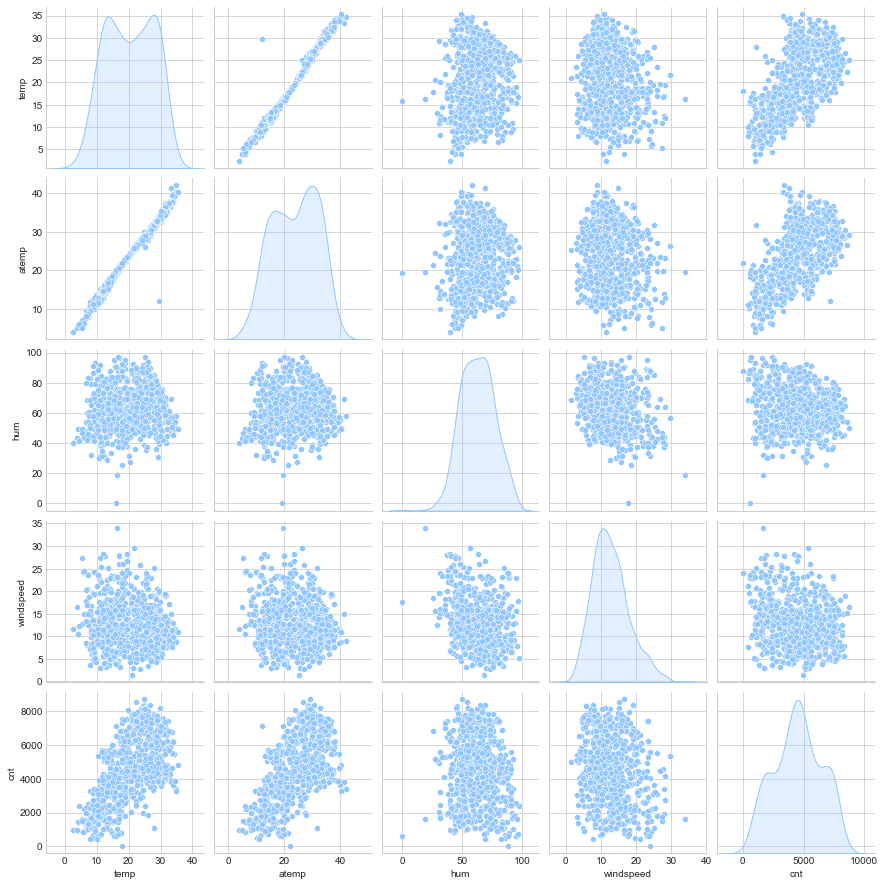

In [108]:
new_bike= new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(new_bike, diag_kind='kde')
plt.show()

#### Clearly, there is a linear relationship between the target variable cnt and couple of predictor variables temp and atemp. 

Other two, i.e hum and windspeed do not maintain a linear relationship with cnt. They are not part our Final model either.

### 7.3.3 There is no multicollinearity between predictor variables


In [109]:
get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,2.21
1,yr,1.91
2,weathersit_Mist/Cloudy,1.46
3,season_spring,1.23
4,mnth_9,1.15
5,mnth_10,1.13
6,weathersit_Light-Snow/Rain/Storm,1.04


Based on the VIF valaues obtained from our final model :


**atemp**  2.21

**yr** 1.91

**season_spring**  1.23

**weathersit_Mist/Cloudy** 1.46

**mnth_9**  1.15

**mnth_10** 1.13

**weathersit_Light-Snow/Rain/Storm**  1.04

    All the VIF values are clearly below the range of 5 and hence within permissible limits

### 7.3.4 Homoscedasticity : Equal distribution of residuals across predictor variables

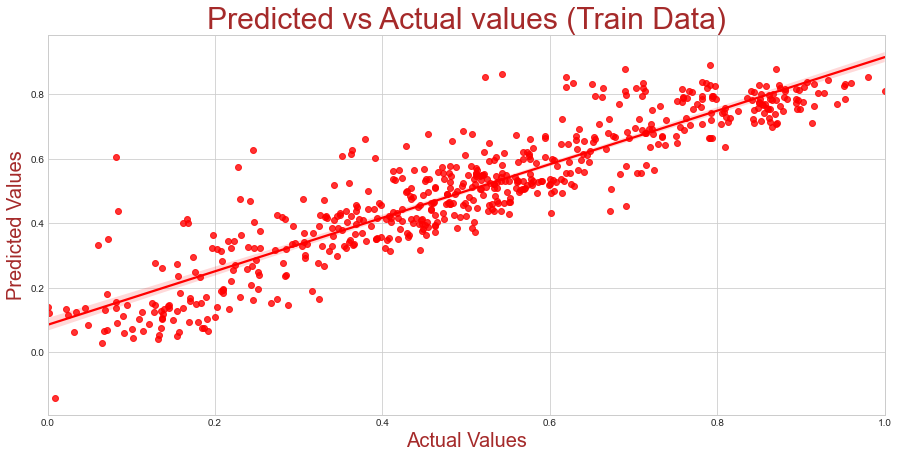

In [110]:
plt.figure(figsize = (15,7))
sns.regplot(x=y, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Train Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

#### Clearly the residuals seem to be equally distribted across the predicted value.

Hence, there exists an equal variance of residuals and we can be sure that there isn't any ambiguity or presence of high or low concentrated regions.

### 7.3.5 Error terms (residuals) are independent of predicted value.

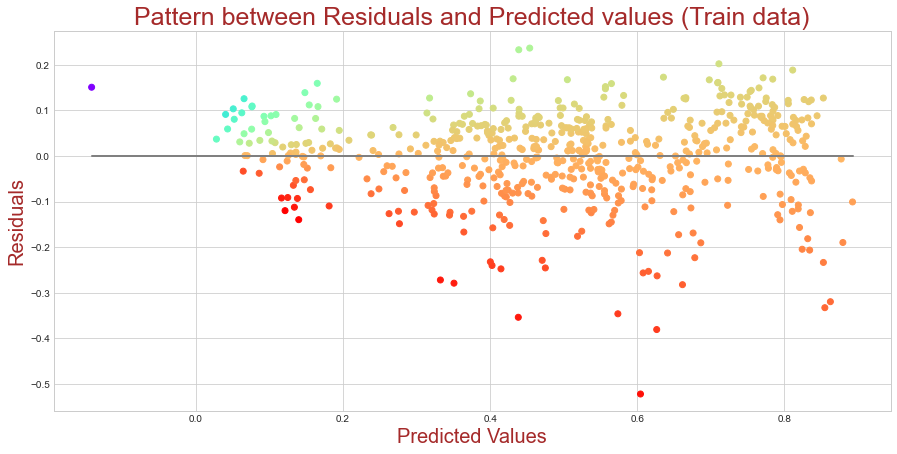

In [111]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Train data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


#### Clearly we don't see any pattern here as expected from our model. There is no specific relation between the residuals and predicted values 

Also, for this dataset, **the time series data might reflect autocorrelation as bike hire demand next year might depend on current year**. In such scenarios the regression model is likely to suffer due to autocorrelation.

As we know the **Durbin-Watson statistic is a test for autocorrelation** in a dataset, we have **Durbin-Watson statistic value : 1.874** and as it is slightly less than 2, this suggests there is a slight positive auto-correlation between some variables.
    
    
**NOTE : Durbin-Watson statistic value : 2 implies NO AUTOCORRELATION**

## 8. Test data analysis

We will now anlyse and make predictions based on our test data as per the final model

### 8.1 Apply scaler to test data 

In [112]:
#Using scalar() on all numeric variables of test dataset, in order to make sure info leak between train and test

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num] = scale.transform(bike_test[bike_num])

In [113]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
358,0,0,0,0.268714,0.263697,0.594623,0.331845,0.039759,1,0,...,0,1,0,0,1,0,0,0,0,0
246,0,0,0,0.809978,0.769676,0.679234,0.460323,0.555022,0,0,...,0,0,0,0,1,0,0,0,0,0
622,1,0,0,0.684333,0.665240,0.344548,0.562988,1.019572,0,0,...,0,0,0,1,0,0,0,0,0,0
309,0,0,0,0.360361,0.371854,0.668793,0.174207,0.396110,0,0,...,1,0,0,0,1,0,0,0,0,0
518,1,0,0,0.677065,0.651150,0.332946,0.404356,0.887494,0,1,...,0,0,0,0,1,0,0,0,0,0


In [114]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.554795,0.034247,0.650685,0.532468,0.504364,0.503861,0.429923,0.499146,0.260274,0.253425,...,0.068493,0.116438,0.123288,0.116438,0.198630,0.109589,0.130137,0.171233,0.047945,0.356164
std,0.498699,0.182488,0.478395,0.230854,0.217635,0.218260,0.207710,0.259679,0.440294,0.436469,...,0.253460,0.321854,0.329899,0.321854,0.400342,0.313452,0.337612,0.378009,0.214386,0.480513
min,0.000000,0.000000,0.000000,0.046591,0.025950,-0.353829,0.093308,-0.050345,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.347122,0.340982,0.358178,0.286147,0.279173,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.515640,0.500580,0.406692,0.507939,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722754,0.678719,0.656902,0.533830,0.699255,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.927898,0.940835,1.213032,1.019572,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


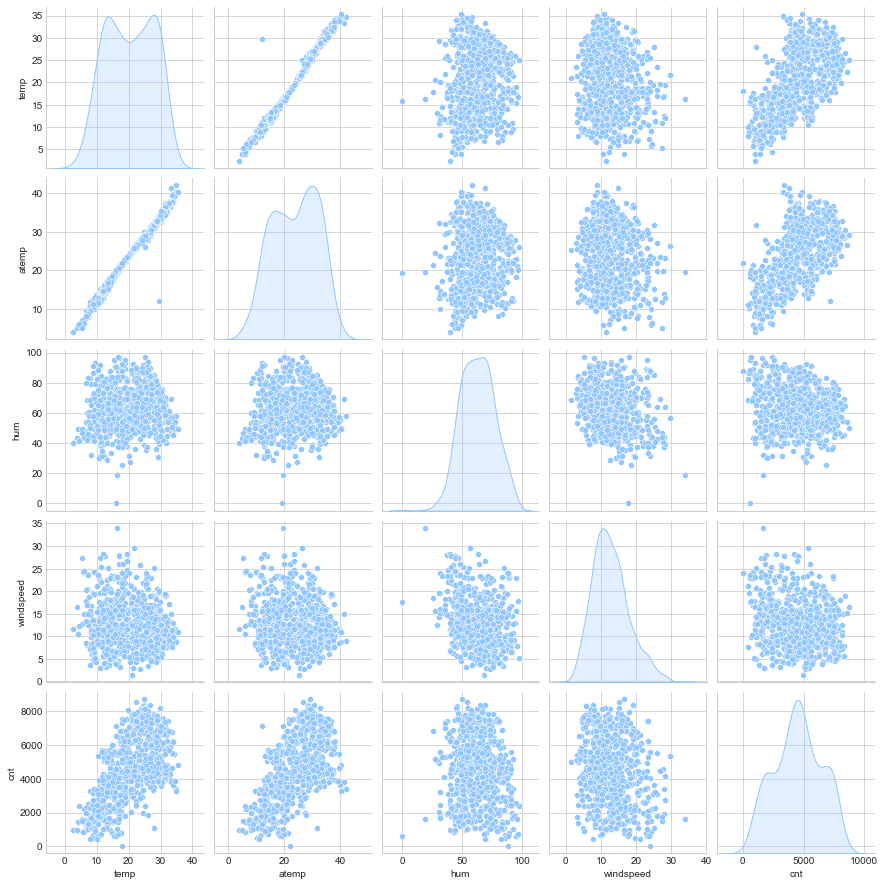

In [115]:
# ANALYZE NUMERICAL COULUMNS FOR TEST DATASET

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num]
sns.pairplot(new_bike, diag_kind='kde')
plt.show()

#### There is a similar pattern as that of train data and bith, temp and atemp show a postive linear correlation with target variable 'cnt'.

#### Also, temp and atemp are multicollinear with each other.

### 8.2 Divide x_test and y_test

In [116]:
#setting up our target variable
y_test = bike_test.pop('cnt')

#setting up our test variables (features)
x_test= bike_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 358 to 472
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                146 non-null    int64  
 1   holiday                           146 non-null    int64  
 2   workingday                        146 non-null    int64  
 3   temp                              146 non-null    float64
 4   atemp                             146 non-null    float64
 5   hum                               146 non-null    float64
 6   windspeed                         146 non-null    float64
 7   season_spring                     146 non-null    uint8  
 8   season_summer                     146 non-null    uint8  
 9   season_winter                     146 non-null    uint8  
 10  mnth_2                            146 non-null    uint8  
 11  mnth_3                            146 non-null    uint8  
 12  mnth_4

In [117]:
## picking all variables which are part of our final model (filteringour required variables)

col_final = x_rfe.columns
x_test_new = x_test[col_final]
x_test_new

,yr,atemp,season_spring,mnth_9,mnth_10,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
358,0,0.263697,1,0,0,0,0
246,0,0.769676,0,1,0,0,0
622,1,0.665240,0,1,0,0,0
309,0,0.371854,0,0,0,0,0
518,1,0.651150,0,0,0,0,0
...,...,...,...,...,...,...,...
342,0,0.313027,0,0,0,0,0
262,0,0.594817,0,1,0,0,1
677,1,0.362738,0,0,0,0,0
705,1,0.318824,0,0,0,0,1


In [118]:
## Add a constant variable to test dataset

x_test_new = sm.add_constant(x_test_new)
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 358 to 472
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             146 non-null    float64
 1   yr                                146 non-null    int64  
 2   atemp                             146 non-null    float64
 3   season_spring                     146 non-null    uint8  
 4   mnth_9                            146 non-null    uint8  
 5   mnth_10                           146 non-null    uint8  
 6   weathersit_Light-Snow/Rain/Storm  146 non-null    uint8  
 7   weathersit_Mist/Cloudy            146 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 5.3 KB


In [119]:
## make predictions based on final model

y_pred =  lr_m9.predict(x_test_new)

### 8.3 Linear Regression Assumptions Check for Test data

#### Residual analysis

<Figure size 432x288 with 0 Axes>

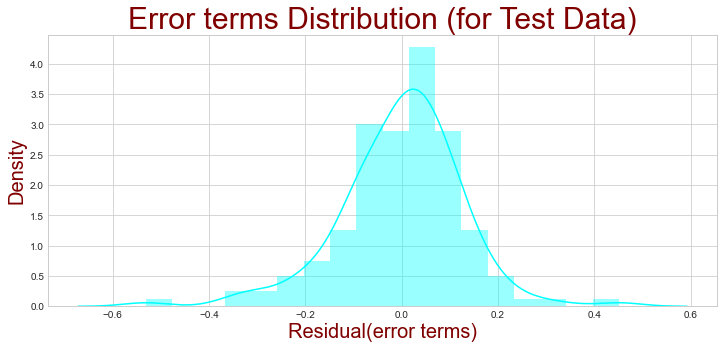

In [120]:
#plotting hist plot to analyse residuals

residual = y_test-y_pred

fig= plt.figure()
plt.figure(figsize = (12,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (for Test Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

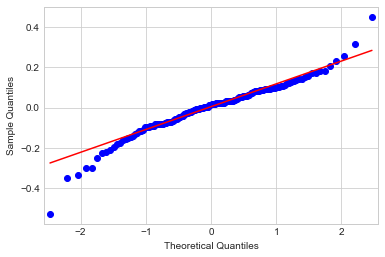

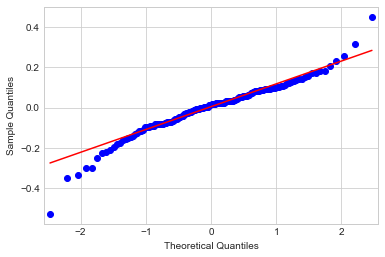

In [121]:
# Q-Q Plot : compare the residuals against normal distribution for Test data
residual = y_test-y_pred
sm.qqplot(residual, line='q')

#### This clearly reflects how our residuals are normally distributed 




#### Linearity check (already covered before using pair plot). No need to plot it again here.

#### Homoscedasticity check

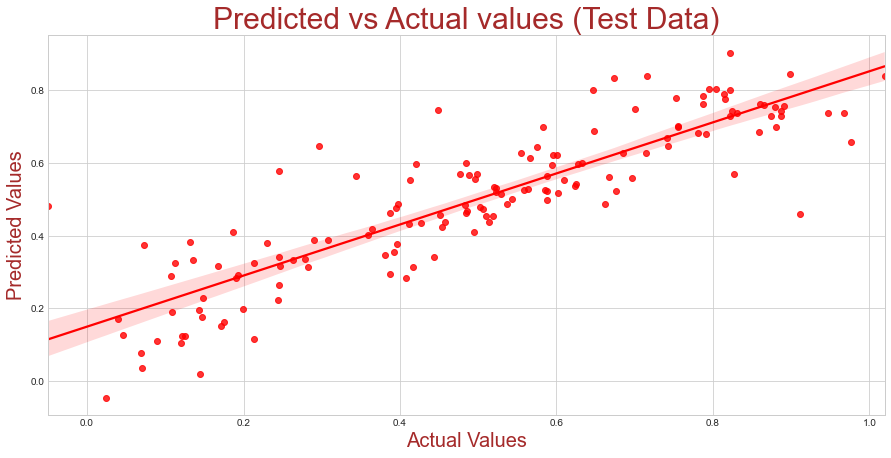

In [122]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

#### Pattern check (between residuals and predicted values)

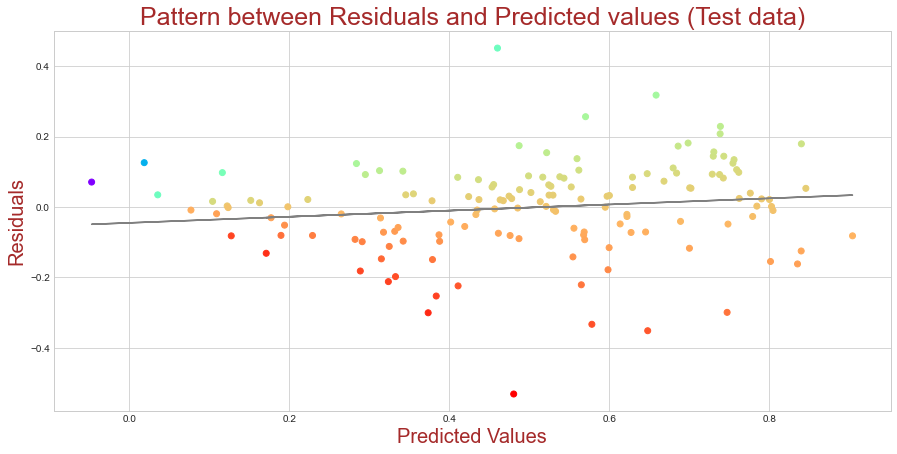

In [123]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Test data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


#### This clearly reflects as we don't see any pattern here as expected from our model. There is no specific relation between the residuals and predicted values


## 9. Model Evaluation

### 9.1 Final model accuracy analysis

<Figure size 432x288 with 0 Axes>

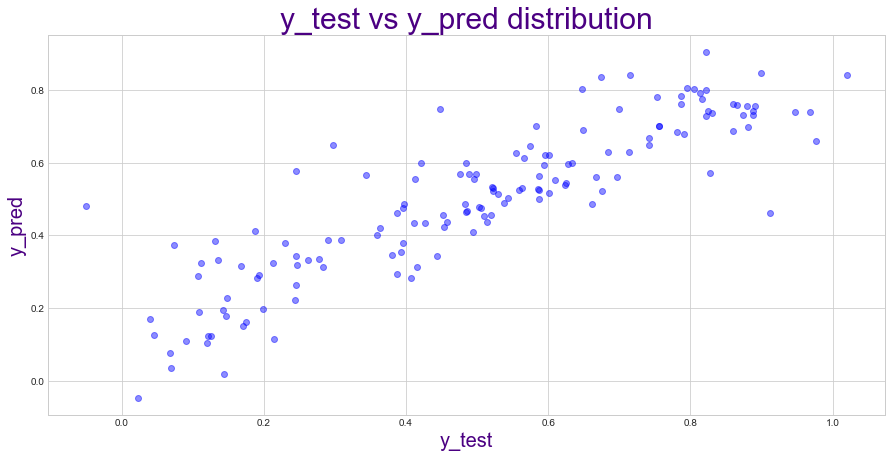

In [124]:
## Plot y_test and y_pred to see the accuracy of our final model
import matplotlib.cm as cm

fig= plt.figure()
c=cm.rainbow
plt.figure(figsize = (15,7))
plt.scatter(y_test, y_pred, alpha= 0.45, color = "blue")
plt.title ('y_test vs y_pred distribution' , fontsize=30, color='indigo')
plt.xlabel("y_test", fontsize=20, color='indigo')
plt.ylabel("y_pred", fontsize=20,  color='indigo')
plt.show()

#### It's clear from the above plot that our model is accurate enough to predict the demand for bikes.

The predicted and actual value points show a significant overlap throughout to indicate the change in demand as well

### 9.2  R-squared comparison for Test and Train 

In [125]:
#calculating R-squared value for test model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7596402630818296

#### For train data final model : R-squared = 0.830

### 9.3 Adjusted R-squared comparison

In [126]:
# evaluate the adjusted R squared for test model

r2 = 0.802050328852287
x_row = x_test.shape[0]

#number of predictors
pred = x_test.shape[1]

#applying adjusted R squared formula
adj_r2 = 1-(1-r2)*(x_row-1)/(x_row-pred-1)
adj_r2

0.7525629110653588

## Conclusion and Recommendation

#### As per the final model (Model-9), the best fit equation is :
    
    
**cnt** = 0.2312 + (yr x 0.2543) + (atemp x 0.3958) - (season_spring x 0.1645) + (mnth_9 x 0.0914) + (mnth_10 x 0.0810) - (weathersit_Light-Snow/Rain/Storm x 0.2732) - (weathersit_Mist/Cloudy x 0.0820)


**Top 5 predictors for our target variable are :**
    
    
   - **Feeling Temperature (atemp)**  It has coefficient value 0.3958. Hence, a unit increase in atemp will increase the number of hired bikes by 0.3958 units
    
 
   - **Year (yr)**  :  It has coefficient value 0.2543. Hence, a unit increase in yr will increase the number of hired bikes by 0.2543 units
   
    
  - **weathersit_Light-Snow/Rain/Storm**  :  It has coefficient value -0.2732. Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by 0.2732 units  
    
 
 - **season_spring**  :  It has coefficient value -0.1645. Hence, a unit increase in season_spring will decrease the number of hired bikes by 0.1645 units
    
  
  - **September Month (mnth_9)** It has coefficient value 0.0914. Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0914 units
    
    
    It is thus important to keep a check on the above to achieve maximum booking for bikes. 

**BoomBikes** must adopt a business plan with the following pointers in consideration :
    
    1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily 
    in regions that are higher in termperature and humidity
    
    2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should 
    not invest heavily in such regions as it will be an insignificant investment.
    
    3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall
    and specially during months July-October.
    
    4. On the other hand, rental count is likely to decrease during Spring season (Feb-April). So company can offer
    discounts or other offers that may enhance the numbers during Spring.
    
    5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of
    bikes per region.